# Assignment 3
# Abalone Age Prediction

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

# 1.Loading Dataset

In [2]:
ds=pd.read_csv(r"E:\4-1\Nalaya Thiran\abalone.csv")
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
ds.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
ds.shape

(4177, 9)

# 2.Visualizations

# Uni-variate Analysis

In [5]:
X = ds.iloc[:,5:16]
X.head()

,Shucked weight,Viscera weight,Shell weight,Rings
0,0.2245,0.1010,0.150,15
1,0.0995,0.0485,0.070,7
2,0.2565,0.1415,0.210,9
3,0.2155,0.1140,0.155,10
4,0.0895,0.0395,0.055,7


In [6]:
y = ds.iloc[:,8]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

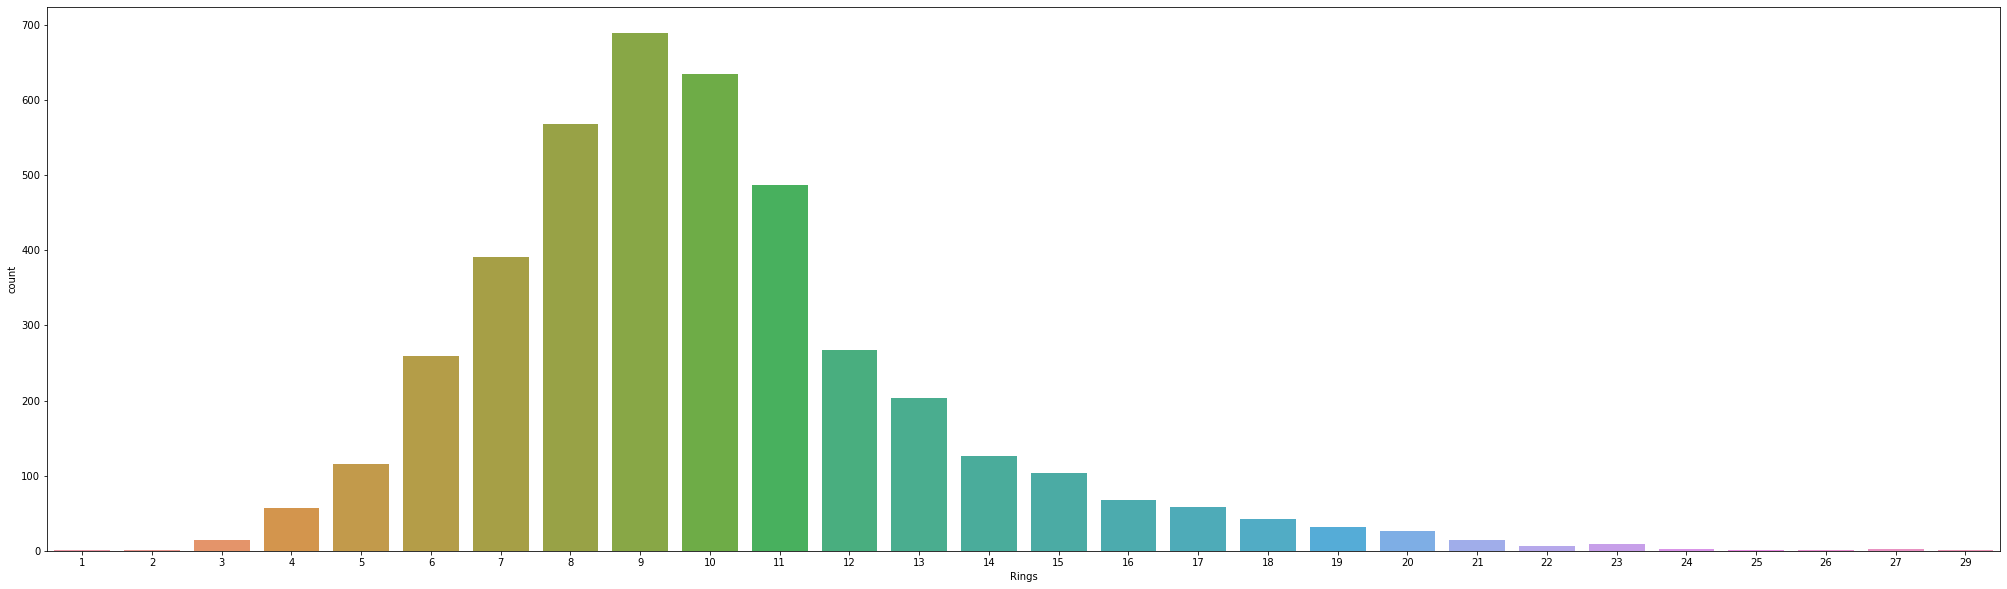

In [7]:
plt.figure(figsize=(35,10))
sns.countplot(x=y)

# Bi-variate Analysis

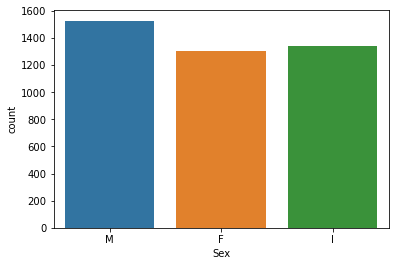

In [8]:
sns.countplot(x=ds['Sex'])
plt.show()

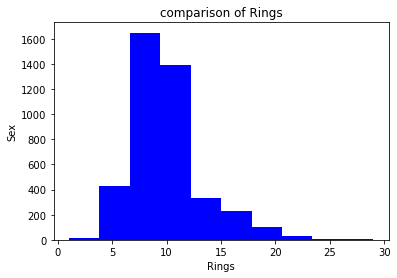

In [9]:
plt.hist(x=ds.Rings,bins=10,color='blue')
plt.title('comparison of Rings')
plt.xlabel('Rings')
plt.ylabel('Sex')
plt.show()

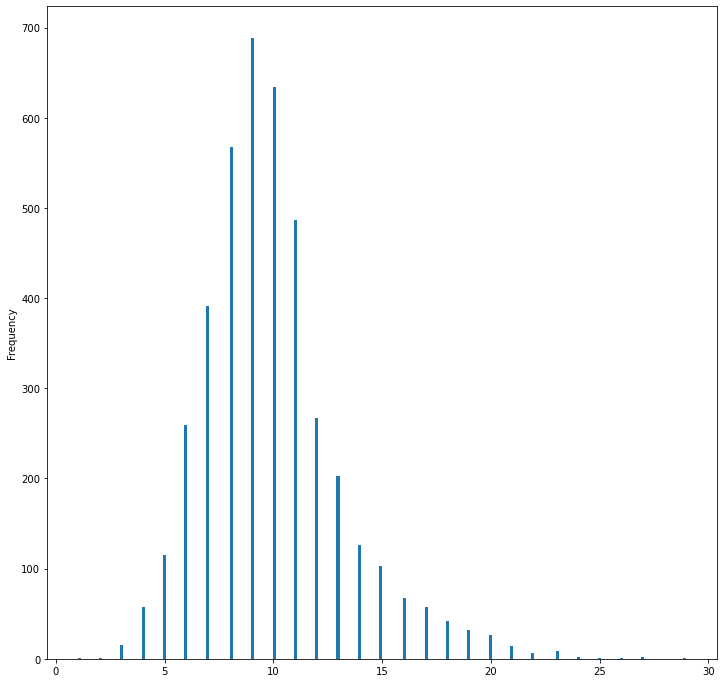

In [10]:
ds.Rings.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

# Multi-variate Analysis

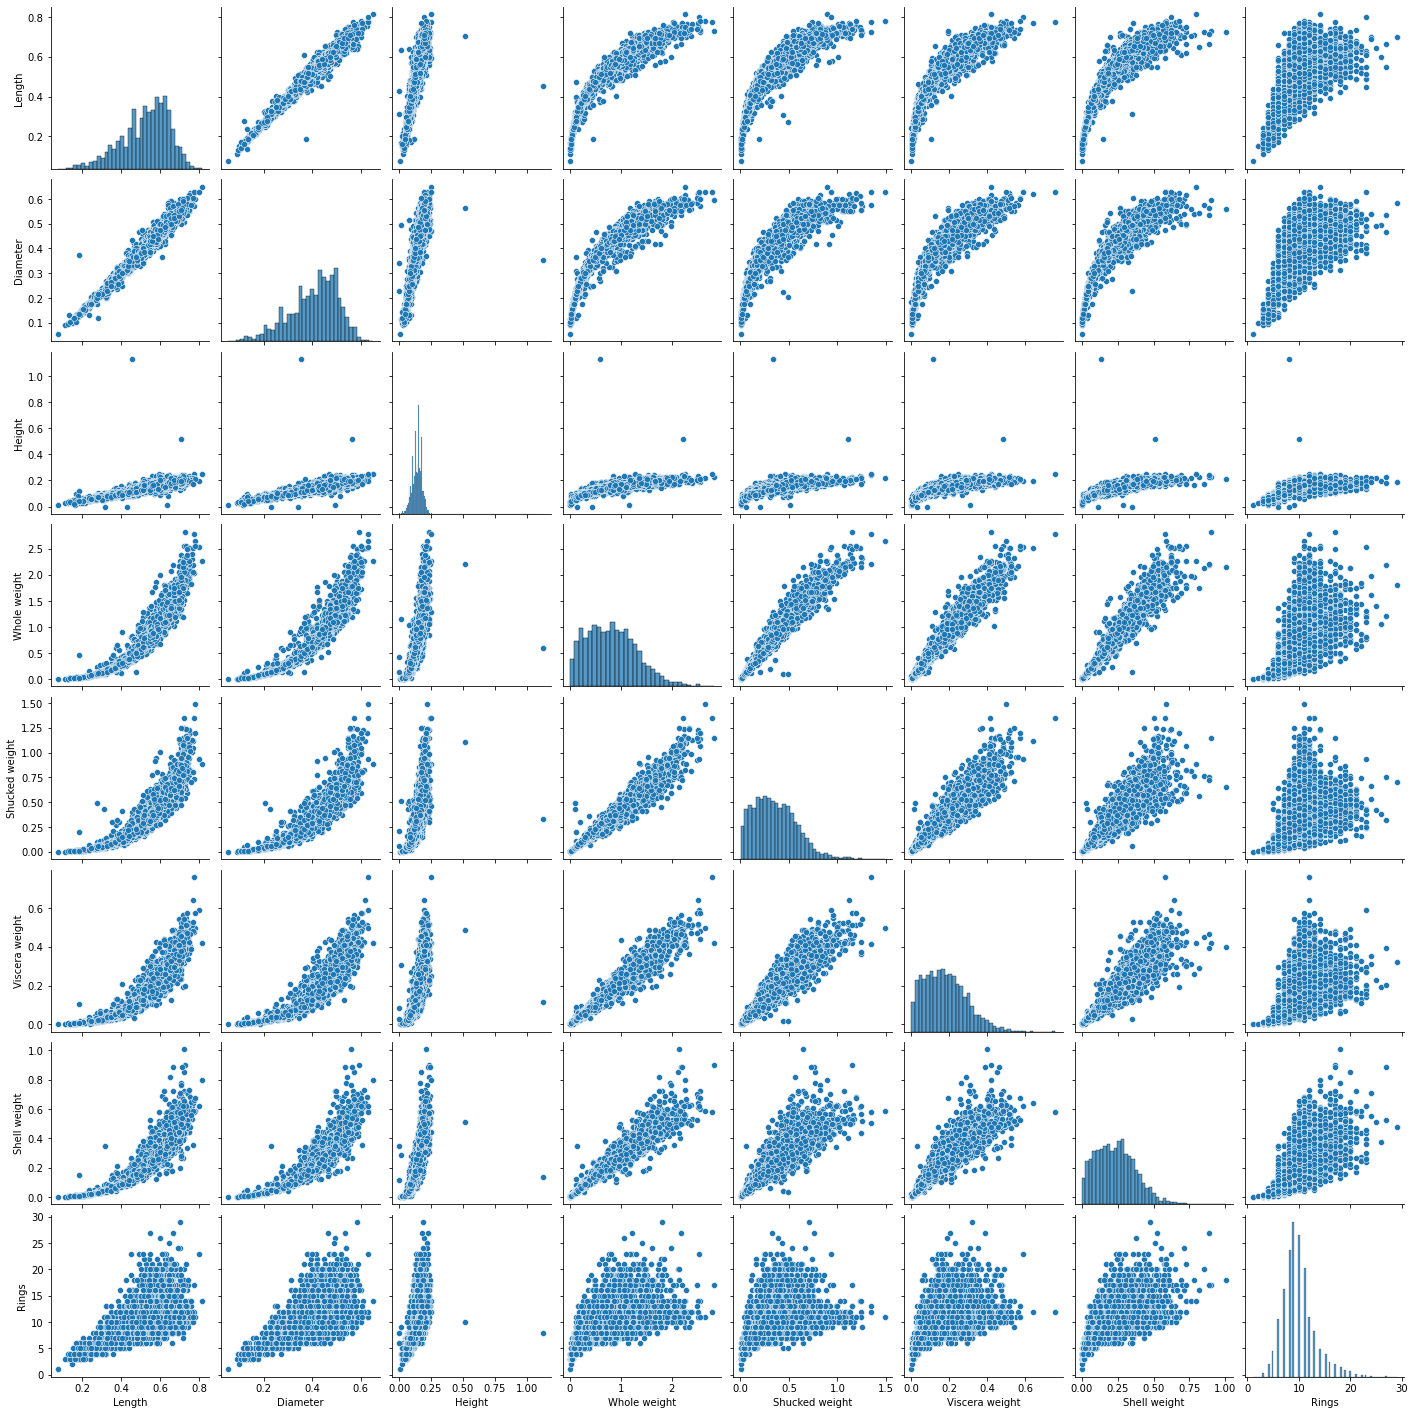

In [11]:
sns.pairplot(ds)

C:\Users\KHSR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rings vs length and sex')

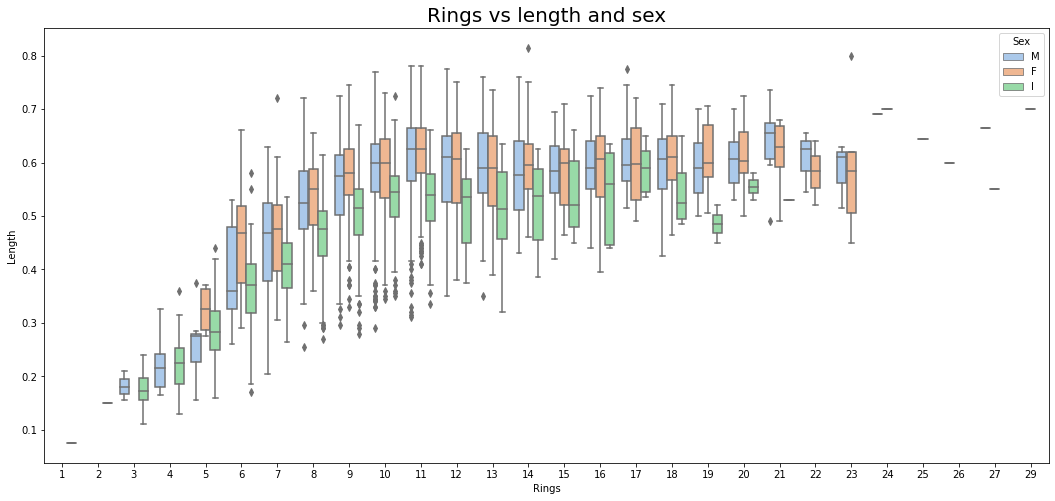

In [12]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(ds['Rings'], ds['Length'], hue = ds['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

C:\Users\KHSR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rings vs diameter and sex')

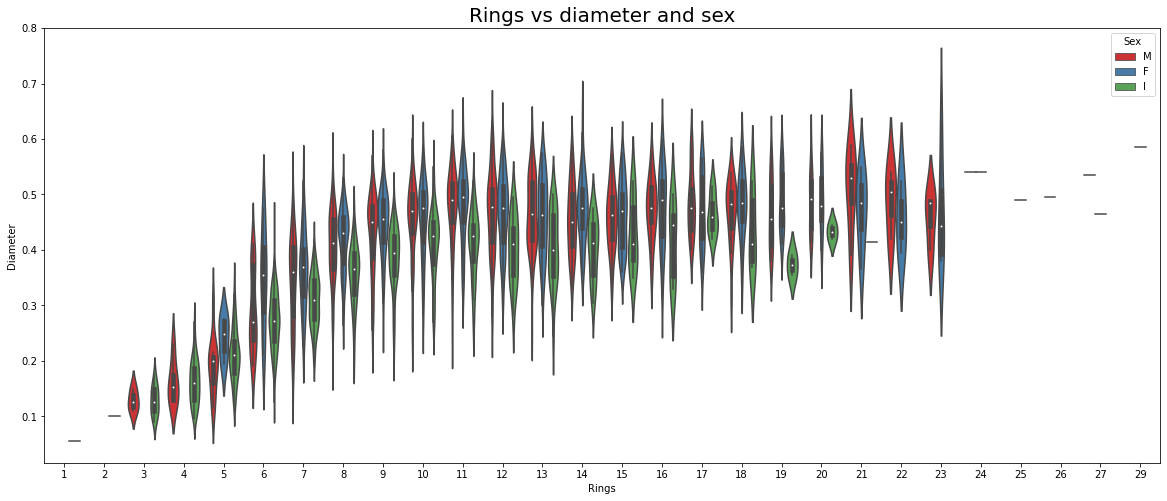

In [13]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(ds['Rings'], ds['Diameter'], hue = ds['Sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)

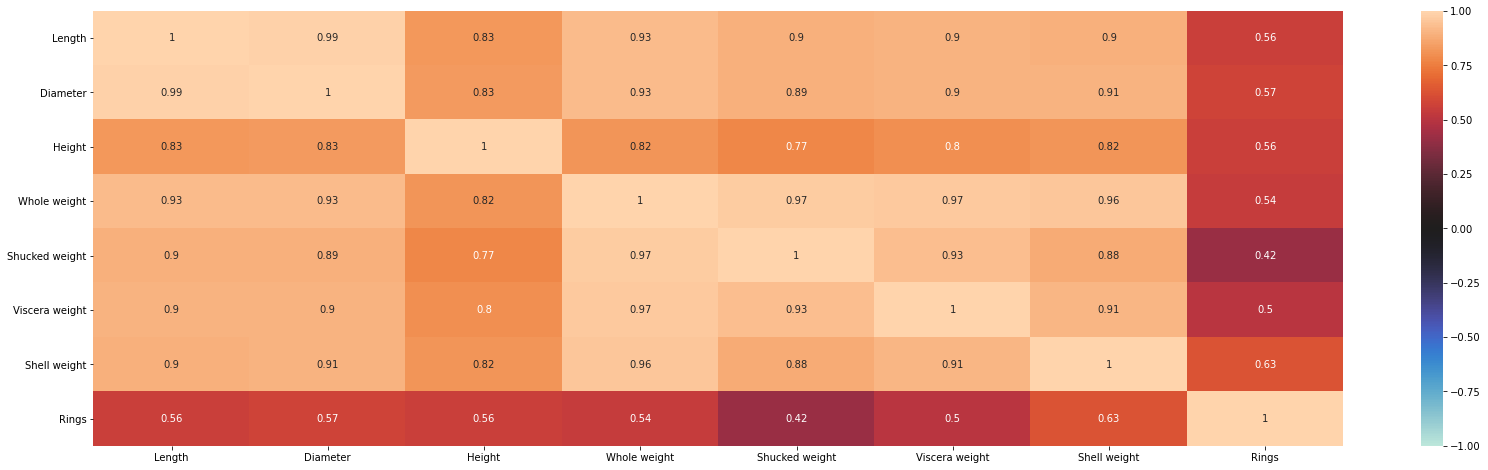

In [14]:
plt.figure(figsize=(28,8))
corr=ds.corr()
sns.heatmap(corr,annot=True,vmin=-1, vmax=1, center= 0);

# 3.Descriptive Statistics

In [15]:
ds.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 4.Handling missing value

In [16]:
ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#no missing values found

# 5.Finding and Handling the outliers

<AxesSubplot:xlabel='Rings'>

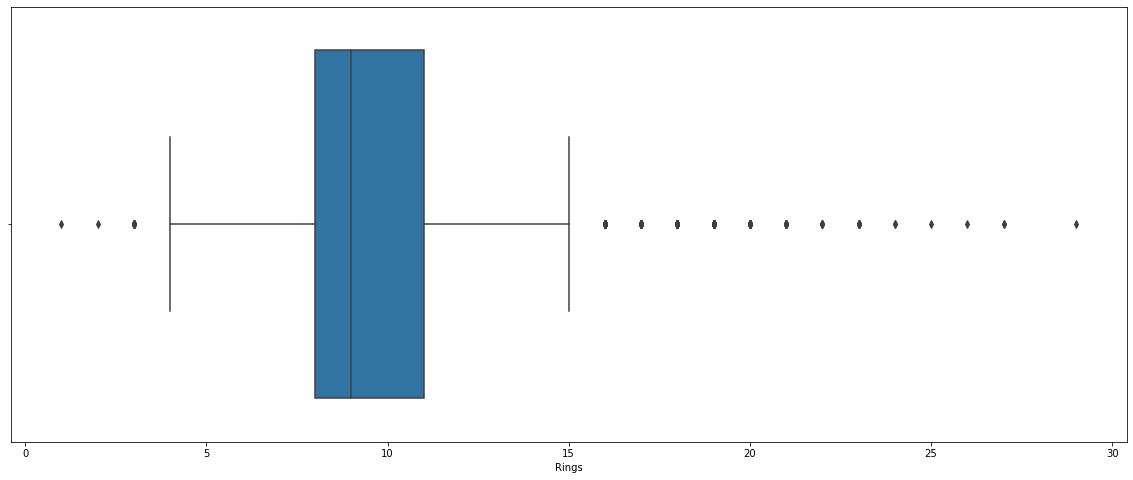

In [17]:
sns.boxplot(x=ds['Rings'])

<AxesSubplot:>

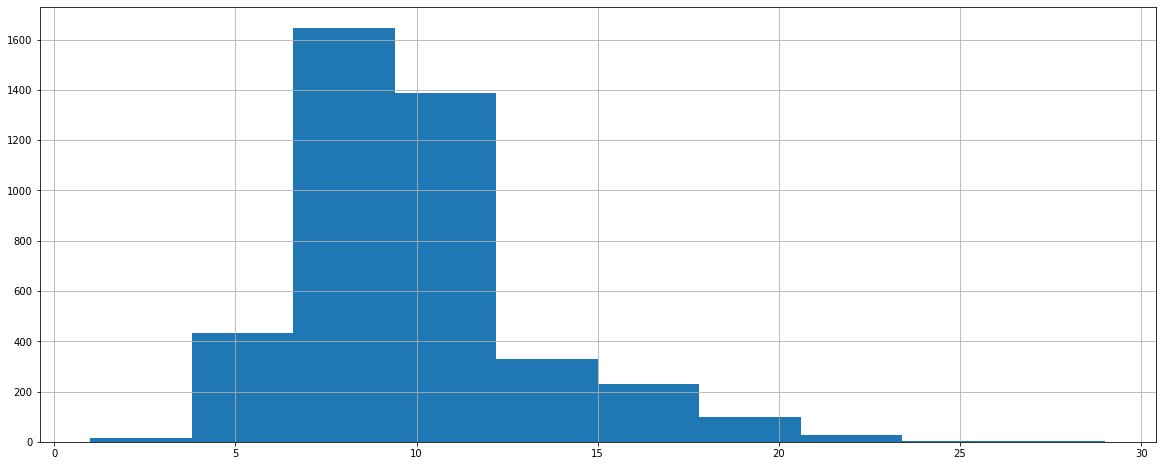

In [18]:
ds['Rings'].hist()

In [19]:
print('skewness value of Rings: ',ds['Rings'].skew())

skewness value of Rings:  1.114101898355677


<AxesSubplot:xlabel='Rings'>

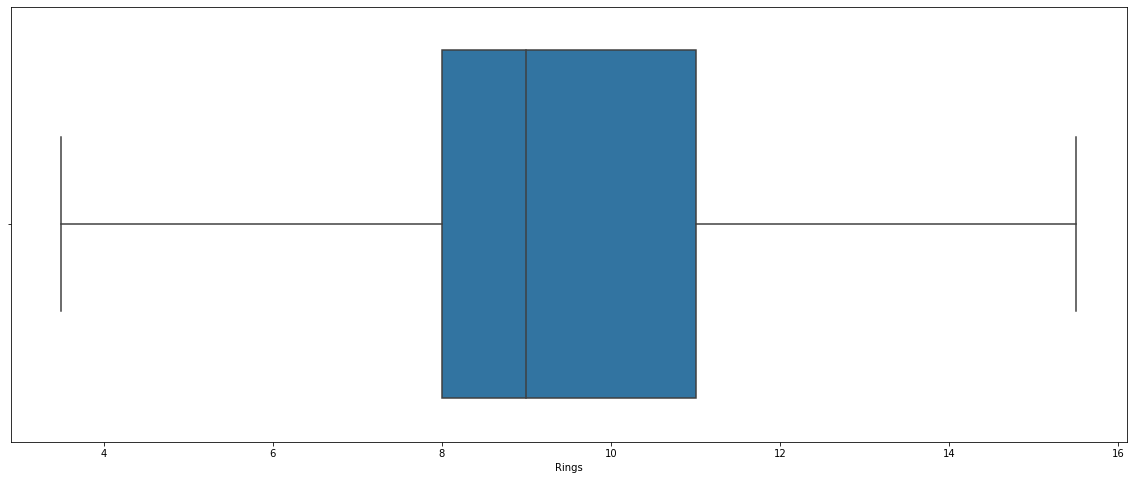

In [20]:
Q1 = ds['Rings'].quantile(0.25)
Q2 = ds['Rings'].quantile(0.75)
IQR = Q2 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q2 +(whisker_width*IQR)
ds['Rings']=np.where(ds['Rings']>upper_whisker,upper_whisker,np.where(ds['Rings']<lower_whisker,lower_whisker,ds['Rings']))
sns.boxplot(x=ds['Rings'])

# 6.Check for Categorical columns and perform encoding

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [22]:
le = LabelEncoder()
ds['Sex'] = le.fit_transform(ds['Sex'])
ds['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [23]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


# 7.Spliting the data into dependent and independent variables

In [24]:
X=ds.drop(columns=["Sex"],axis=1)
y=ds["Sex"]
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)
X.head()

Shape of x: (4177, 8)
Shape of y: (4177,)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


# 8.Scaling the independent variables

In [25]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_scaler = min_max_scaler.fit_transform(X)
print ("\nAfter min max Scaling : \n", x_scaler)


After min max Scaling : 
 [[0.51351351 0.5210084  0.0840708  ... 0.1323239  0.14798206 0.95833333]
 [0.37162162 0.35294118 0.07964602 ... 0.06319947 0.06826109 0.29166667]
 [0.61486486 0.61344538 0.11946903 ... 0.18564845 0.2077728  0.45833333]
 ...
 [0.70945946 0.70588235 0.18141593 ... 0.37788018 0.30543099 0.45833333]
 [0.74324324 0.72268908 0.13274336 ... 0.34298881 0.29347285 0.54166667]
 [0.85810811 0.84033613 0.17256637 ... 0.49506254 0.49177877 0.70833333]]


In [26]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(X)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.57455813 -0.43214879 -1.06442415 ... -0.72621157 -0.63821689
   1.89365646]
 [-1.44898585 -1.439929   -1.18397831 ... -1.20522124 -1.21298732
  -1.00079163]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.35668983 -0.20713907
  -0.27717961]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.97541324  0.49695471
  -0.27717961]
 [ 0.84118198  0.77718745  0.25067161 ...  0.73362741  0.41073914
   0.0846264 ]
 [ 1.54905203  1.48263359  1.32665906 ...  1.78744868  1.84048058
   0.80823842]]


# 9.Spliting the data into training and testing

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3341, 8)
Shape of x_test : (836, 8)
Shape of y_train : (3341,)
Shape of y_test : (836,)


# 10.Building,Training and Testing the model

In [28]:
model=RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict_train = model.predict(x_train)

In [29]:
print(f'Training accuracy:{(accuracy_score(y_train,y_predict_train))*100:.2f}%')
print(f'Testing accuracy:{(accuracy_score(y_test,y_predict))*100:.2f}%')

Training accuracy:98.26%
Testing accuracy:55.02%


In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45       249
           1       0.75      0.76      0.75       291
           2       0.46      0.41      0.43       296

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.55       836
weighted avg       0.55      0.55      0.55       836

